In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


### Q1:- For performing sentiment analysis, can you pickup which columns would be useful?

In [5]:
print('For performing sentiment analysis we would need :', df.columns[1], 'and',df.columns[10] )

For performing sentiment analysis we would need : airline_sentiment and text


### Q2:-There are three sentiment positive, negative & neutral. What is the average count of each sentiment?


In [6]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

<AxesSubplot:>

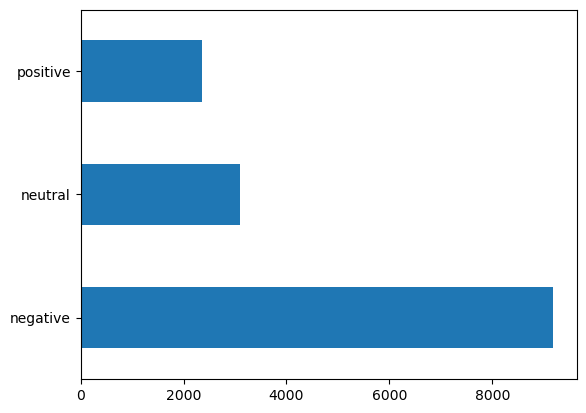

In [7]:
df['airline_sentiment'].value_counts().plot(kind='barh')

### Q3:-What are some of the common negative feedbacks given?

In [8]:
df['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

<AxesSubplot:>

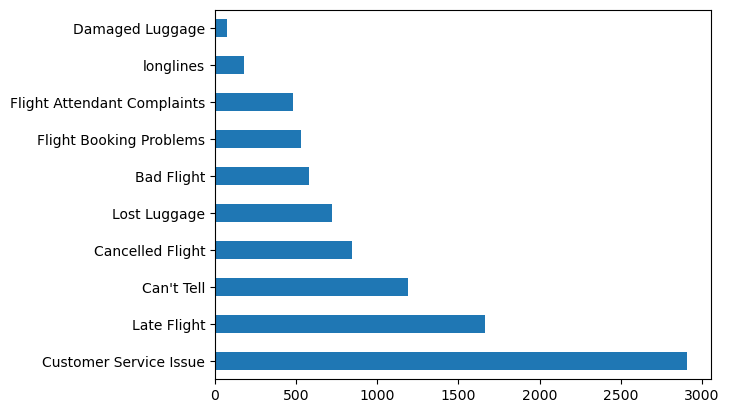

In [9]:
df['negativereason'].value_counts().plot(kind='barh')

### Q4:-How many different airlines are present in the dataset?

In [10]:
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:>

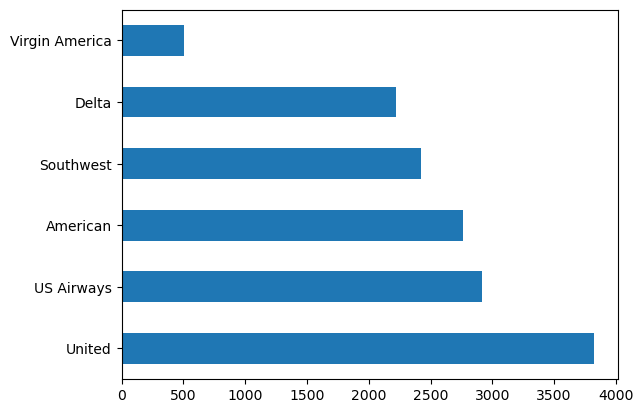

In [11]:
df['airline'].value_counts().plot(kind ='barh')

### Q5:-Could you generate the no. of sentiments of each airline from the data?

In [13]:
df_airline_sentiment = pd.crosstab(df['airline'],df['airline_sentiment'])
df_airline_sentiment

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


<AxesSubplot:xlabel='airline'>

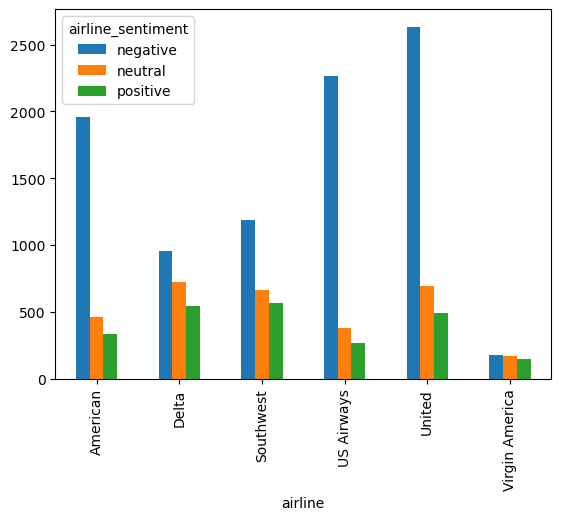

In [14]:
df_airline_sentiment.plot(kind='bar')

### Q6:-Which airline has the maximum negative sentiments?


In [19]:
print('From the above analysis it is clear that the airline which has the maximum negative sentiments is ',df_airline_sentiment.index[0])

From the above analysis it is clear that the airline which has the maximum negative sentiments is  American


### Q7:-What is the most common negative feedback given?

In [21]:
print('most common negative feedback given to :',df['negativereason'].value_counts().index[0])

most common negative feedback given to : Customer Service Issue


### Q8:-Is there a specific day where a lot of negative feedbacks were given?

In [24]:
df['tweet_created'] = pd.to_datetime(df['tweet_created']).dt.strftime('%d-%m-%Y')

In [27]:
df_tweet_date = pd.crosstab(df['tweet_created'],df['airline_sentiment'])
df_tweet_date

airline_sentiment,negative,neutral,positive
tweet_created,,,
16-02-2015,3,1,0
17-02-2015,838,297,273
18-02-2015,736,335,273
19-02-2015,751,329,296
20-02-2015,835,383,282
21-02-2015,1049,278,230
22-02-2015,2266,463,350
23-02-2015,1919,676,433
24-02-2015,781,337,226


<AxesSubplot:xlabel='tweet_created'>

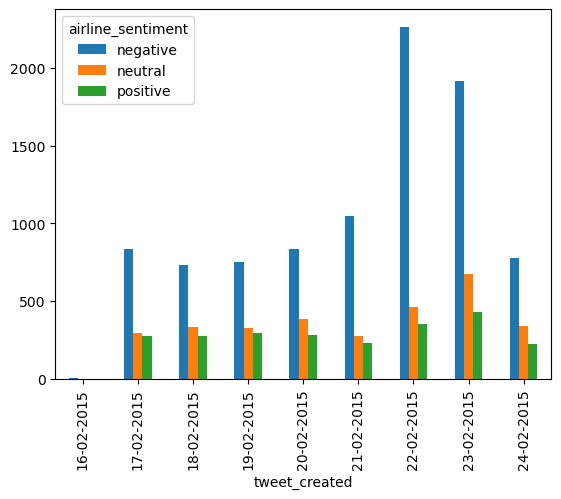

In [28]:
df_tweet_date.plot(kind='bar')

### Q9:-From your analysis, which airline do you feel is doing the best?


<AxesSubplot:xlabel='airline'>

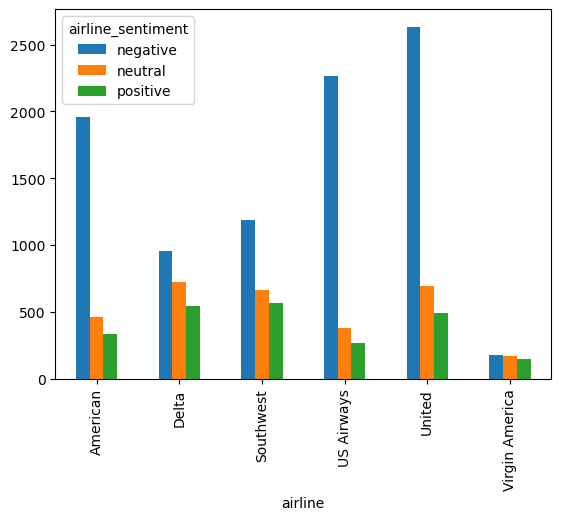

In [29]:
df_airline_sentiment = pd.crosstab(df['airline'],df['airline_sentiment'])
df_airline_sentiment.plot(kind='bar')

In [31]:
print(' As Virgin America has a very small diffrernce between negative and postive feedback we can conclude that it is doing the best')

 As Virgin America has a very small diffrernce between negative and postive feedback we can conclude that it is doing the best


In [32]:
print(' As US airways has a very huge diffrernce between negative and postive feedback we can conclude that it is doing the worst')

 As US airways has a very huge diffrernce between negative and postive feedback we can conclude that it is doing the worst
